# Task 3 Car Price Predicition

## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

## Data Collection and Processing

In [2]:
#loading the dataset
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# checking the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


## Data Preprocessing

1) That column has object data type.
2) We can't label encode it, because it has much more number of unique data (car name).

In [8]:
df = df.drop('Car_Name',axis=1)

In [9]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# EDA

<Axes: >

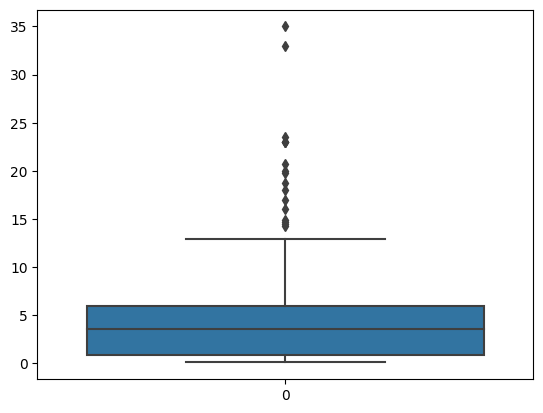

In [10]:
#checking the outliers
sns.boxplot(df['Selling_Price'])

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


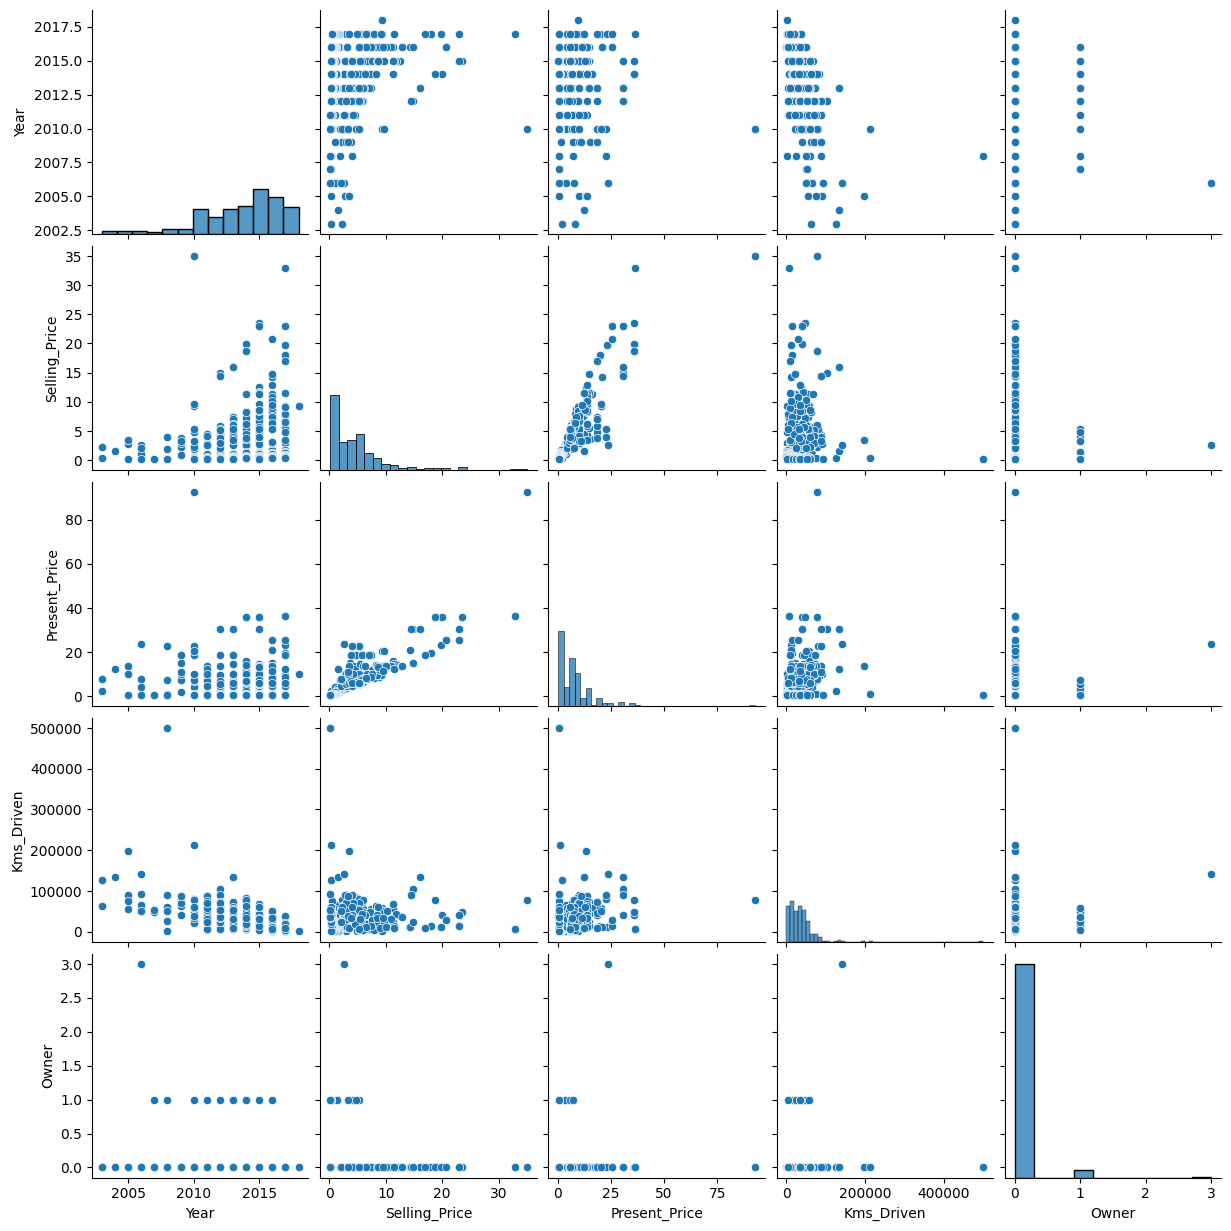

In [11]:
sns.pairplot(df)


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


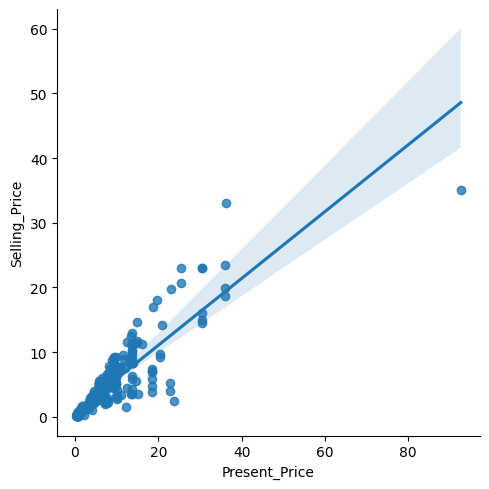

In [12]:
sns.lmplot(x='Present_Price',y='Selling_Price',data=df)

([<matplotlib.patches.Wedge at 0x1f447176810>,
 [Text(-0.8776154230777207, 0.6631675272328356, 'Petrol'),
  Text(0.8635820276996969, -0.6813413839141726, 'Diesel'),
  Text(1.0997603522251278, -0.022960132265800064, 'CNG')],
 [Text(-0.4786993216787566, 0.36172774212700115, '79%'),
  Text(0.47104474238165284, -0.371640754862276, '20%'),
  Text(0.5998692830318878, -0.012523708508618217, '1%')])

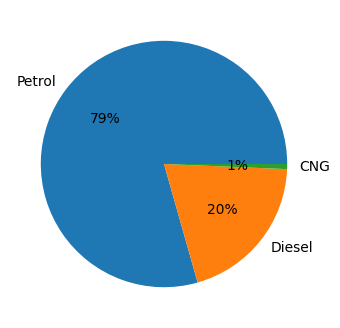

In [13]:
fuel_types = ['Petrol','Diesel','CNG']

fuel_data = pd.Series(df['Fuel_Type']).value_counts()

plt.figure(figsize=(4,4))

plt.pie(fuel_data,labels=fuel_types,autopct='%.0f%%')

([<matplotlib.patches.Wedge at 0x1f4471e3e10>,
 [Text(-1.0055216878866322, 0.44601136217547, 'Manual'),
  Text(1.0055217087659298, -0.4460113151036022, 'Automatic')],
 [Text(-0.5484663752108903, 0.24327892482298358, '87%'),
  Text(0.548466386599598, -0.24327889914741935, '13%')])

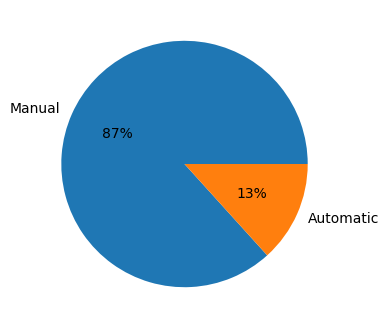

In [14]:
transmission = ['Manual','Automatic']

trans_data = pd.Series(df['Transmission']).value_counts()

plt.figure(figsize=(4,4))

plt.pie(trans_data,labels=transmission,autopct='%.0f%%')

Text(0.5, 1.0, 'Correlation (Without Label Encoder of Features)')

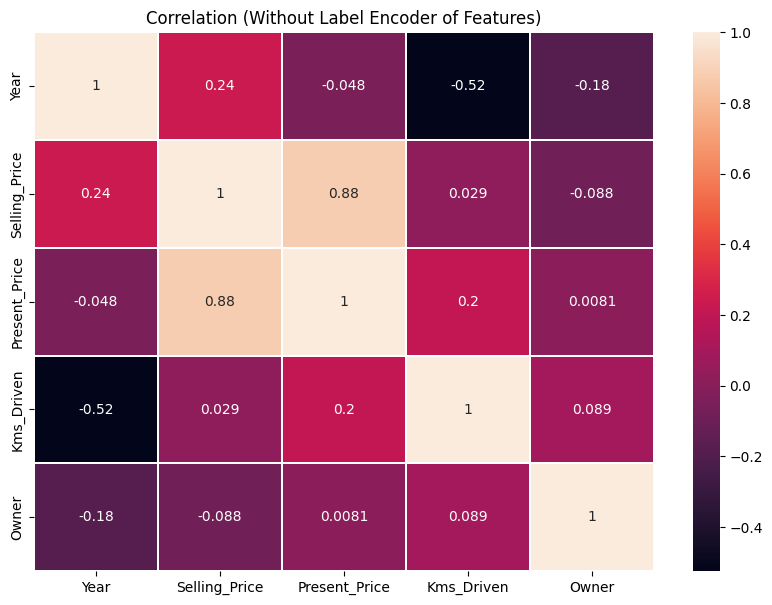

In [15]:
plt.figure(figsize=(10,7))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, linewidths=0.2, linecolor='white')
plt.title('Correlation (Without Label Encoder of Features)')

## Encoding the Categorical Data

In [16]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace = True)

# encoding "Seller_Type" Column
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [17]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0


Text(0.5, 1.0, 'Correlation (After Label Encoder of Features)')

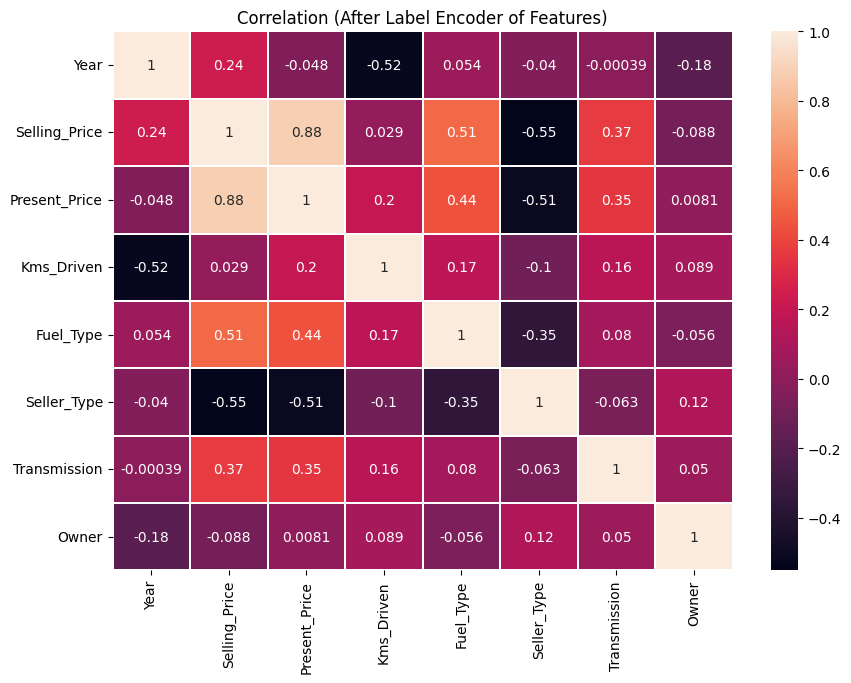

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.2,linecolor='white')
plt.title('Correlation (After Label Encoder of Features)')

Text(0.5, 1.0, 'Correlation Plot of All Features')

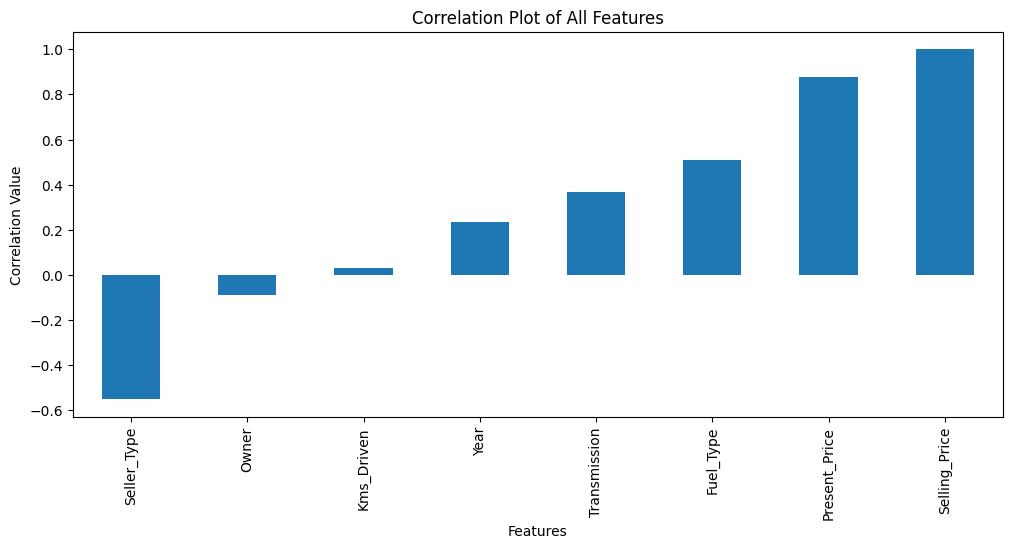

In [19]:

plt.figure(figsize=(12,5))

df.corr()['Selling_Price'].sort_values().plot(kind='bar')

plt.xlabel('Features')

plt.ylabel('Correlation Value')

plt.title('Correlation Plot of All Features')

Splitting the data and Target

In [20]:
X = df.drop(['Selling_Price'],axis=1)
Y = df['Selling_Price']

In [21]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [22]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

# Splitting Training and Test data

In [23]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y, test_size = 0.1, random_state=2)

In [24]:
X_train

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
204,2015,4.430,28282,0,0,0,0
249,2016,7.600,17000,0,0,0,0
277,2015,13.600,21780,0,0,0,0
194,2008,0.787,50000,0,1,0,0
244,2013,9.400,49000,1,0,0,0
...,...,...,...,...,...,...,...
75,2015,6.800,36000,0,0,0,0
22,2011,8.010,50000,0,0,1,0
72,2013,18.610,56001,0,0,0,0
15,2016,10.790,43000,1,0,0,0


In [25]:
X_train.shape,X_test.shape

((270, 7), (31, 7))

In [26]:
## Feature Selection based on correlaltion
X_train.corr()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,-0.040662,-0.526696,0.087304,-0.059620,-0.020443,-0.157241
Present_Price,-0.040662,1.000000,0.190132,0.454139,-0.497530,0.369677,0.016289
Kms_Driven,-0.526696,0.190132,1.000000,0.145187,-0.077955,0.186396,0.084502
Fuel_Type,0.087304,0.454139,0.145187,1.000000,-0.342593,0.123457,-0.051072
Seller_Type,-0.059620,-0.497530,-0.077955,-0.342593,1.000000,-0.080811,0.116835
Transmission,-0.020443,0.369677,0.186396,0.123457,-0.080811,1.000000,0.059972
Owner,-0.157241,0.016289,0.084502,-0.051072,0.116835,0.059972,1.000000


# Model Training

### Linear Regression

In [27]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

### Model Evaluation

In [28]:
# prediction on Testing data
linear_prediction = model.predict(X_test)
print("Test Data")
# R squared Error
error_score = metrics.r2_score(Y_test, linear_prediction)
mse_score = metrics.mean_squared_error(Y_test,linear_prediction)
print("R squared Error of Test Data : ", error_score)
print("mse :" , mse_score)

Test Data
R squared Error of Test Data :  0.8365766715026374
mse : 2.15012991898452


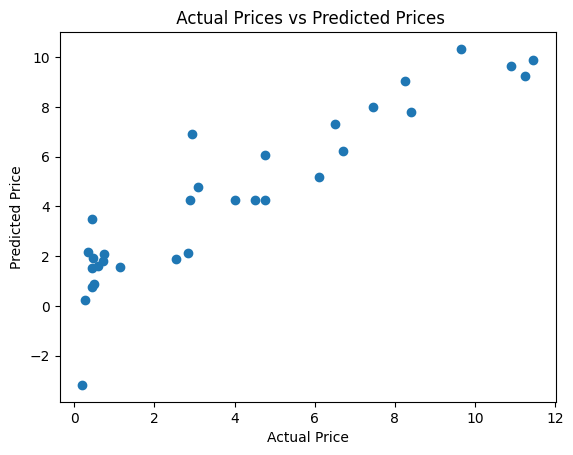

In [29]:
plt.scatter(Y_test, linear_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

### Lasso Regression

In [30]:
# loading the linear regression model
lass_reg_model = Lasso()
lass_reg_model.fit(X_train,Y_train)



Lasso()

In [31]:
# prediction on testing data
lasso_prediction = lass_reg_model.predict(X_test)
# R squared Error
error_score = metrics.r2_score(Y_test, lasso_prediction)
mse_score = metrics.mean_squared_error(Y_test,lasso_prediction)
print("R squared Error : ", error_score)
print("mse :" , mse_score)

R squared Error :  0.8709167941173195
mse : 1.6983234006965484


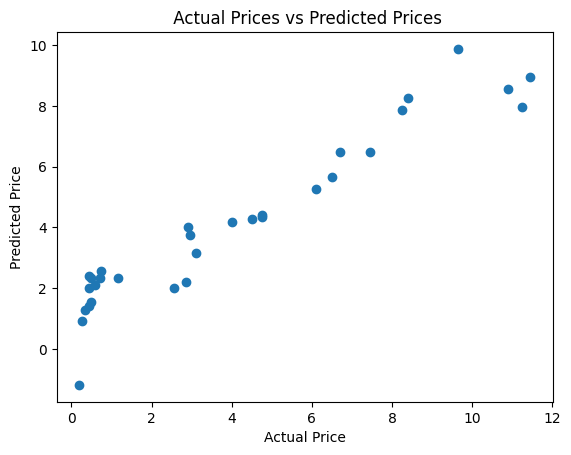

In [32]:
plt.scatter(Y_test, lasso_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

### Ridge Regression

In [33]:
from sklearn.linear_model import Ridge
model_rid=Ridge()
model_rid.fit(X_train,Y_train)


Ridge()

R squared Error :  0.8400976059753111
mse : 1.6983234006965484


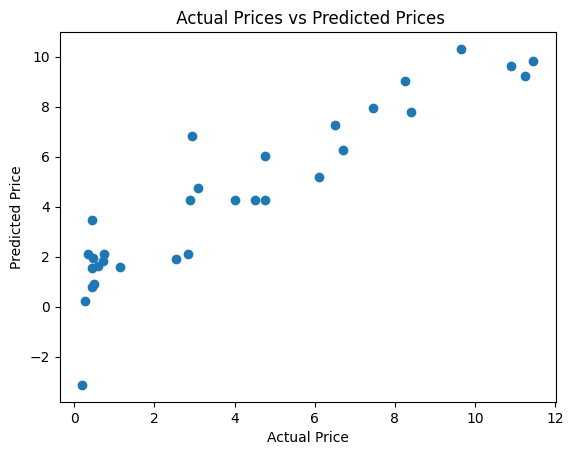

In [34]:
# prediction on testing data
ridge_prediction = model_rid.predict(X_test)
# R squared Error
error_score =metrics.r2_score(Y_test,ridge_prediction)
mse = metrics.mean_squared_error(Y_test,ridge_prediction)
print("R squared Error : ", error_score)
print("mse :" , mse_score)
plt.scatter(Y_test, ridge_prediction )
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [35]:
differ = pd.DataFrame({'Actual Price':Y_test,'Prediction Price':lasso_prediction,'Difference':(Y_test - lasso_prediction)})
differ

,Actual Price,Prediction Price,Difference
99,9.65,9.878881,-0.228881
161,0.45,1.423963,-0.973963
89,4.75,4.332678,0.417322
30,3.10,3.173134,-0.073134
232,11.45,8.955906,2.494094
290,4.50,4.293974,0.206026
35,2.95,3.739136,-0.789136
7,6.50,5.662840,0.837160
183,0.27,0.914784,-0.644784
13,6.10,5.255143,0.844857


## Model Prediction

In [36]:
lass_reg_model.predict([[2016,5.79,8000,2,0,1,0]])


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([4.74166995])

According to model, if:

year = 2016

present price = 5.79 (5.79L)

Driven Kms = 8000

Fuel Type = Petrol

Selling Type = Dealer

Transmission = Manual

Owner = 0

Then, Selling Price = 4.74L